In [ ]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import os
import pickle
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.utils import shuffle
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from scipy.ndimage.interpolation import shift

# 1 Aquisição dos dados

In [ ]:
dataset = fetch_openml('mnist_784', version=1, cache=True)
dataset.target = dataset.target.astype(np.int8)

In [ ]:
print(dataset.data.shape)
print(dataset.target.shape)

(70000, 784)
(70000,)


In [ ]:
x,y = dataset['data'], dataset['target']

# 1.1 Convertendo para array

In [ ]:
x

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
type(x)

pandas.core.frame.DataFrame

In [ ]:
x = x.to_numpy()
x

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
type(y)

pandas.core.series.Series

In [ ]:
y.value_counts()

1    7877
7    7293
3    7141
2    6990
9    6958
0    6903
6    6876
8    6825
4    6824
5    6313
Name: class, dtype: int64

In [ ]:
y = y.to_numpy()
y

array([5, 0, 4, ..., 4, 5, 6], dtype=int8)

# 2 Visualização dos dados

In [ ]:
num = x[6000].reshape(28,28)
num

array([[  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,  59., 200., 255., 229.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,  50., 200., 253., 251., 102.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.],
       [  0.,   0.,   0.,   0.,   0

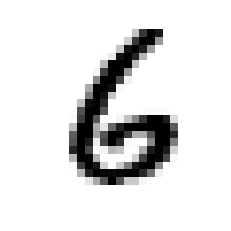

In [ ]:
plt.imshow(num, cmap = mpl.cm.binary,
           interpolation="nearest")
plt.axis("off")
plt.show()

In [ ]:
y[6000]

6

# 3 Divisão treino/teste

In [ ]:
x_train, y_train, x_test, y_test = x[:60000], y[:60000], x[60000:], y[60000:]

In [ ]:
x_train, y_train = shuffle(x_train, y_train)

In [ ]:
x_test, y_test = shuffle(x_test, y_test)

In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [ ]:
pickle.dump(x_train, open('x_train.pickle', 'wb'))
pickle.dump(x_test, open('x_test.pickle', 'wb'))
pickle.dump(y_train, open('y_train.pickle', 'wb'))
pickle.dump(y_test, open('y_test.pickle', 'wb'))

# 4 Classificação sem augmentation

In [ ]:
results = {}

In [ ]:
def runGridSeach(clf, params,x_train,y_train):
    search = GridSearchCV(clf,
                        params,
                        scoring = 'accuracy',
                        cv = 5, n_jobs=-1
                        )
    search.fit(x_train, y_train)
    parametros = search.best_params_
    print(parametros)
    return parametros

In [ ]:
def metrics(clf, pred, y_test, results):
    acc = round(accuracy_score(pred,y_test),4)
    pr = round(precision_score(y_test, pred, average='weighted'),4)
    re = round(recall_score(y_test, pred, average='weighted'),4)
    f1 = round(f1_score(y_test,pred, average='weighted'),4)
    results[clf] = [acc, pr, re, f1]
    printMtr(results[clf])

In [ ]:
def printMtr(results):
    print("Acc = ", results[0])
    print("Precision = ", results[1])
    print("Recall = ", results[2])
    print("F1 = ", results[3])

## 4.1 Random Forest

In [ ]:
rf_clf = RandomForestClassifier()

In [ ]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [ ]:
pred = rf_clf.predict(x_test)

In [ ]:
metrics('rf',pred, y_test, results)

Acc =  0.9694
Precision =  0.9694
Recall =  0.9694
F1 =  0.9694


In [ ]:
results

{'rf': [0.9694, 0.9694, 0.9694, 0.9694]}

### 4.1.1 Grid Search

In [ ]:
prs = {'n_estimators': [200,250, 300,  400], 'max_features': [2, 4, 6], 'bootstrap': [False]}

In [ ]:
prs_rf = runGridSeach(rf_clf, prs,x_train,y_train)

{'bootstrap': False, 'max_features': 6, 'n_estimators': 400}


In [ ]:
rf_clf = RandomForestClassifier(n_estimators=prs_rf['n_estimators'], max_features=prs_rf['max_features'], bootstrap=False, n_jobs=-1)

In [ ]:
rf_clf.fit(x_train,y_train)

RandomForestClassifier(bootstrap=False, max_features=6, n_estimators=400,
                       n_jobs=-1)

In [ ]:
pred = rf_clf.predict(x_test)

In [ ]:
metrics('rf_gs',pred, y_test, results)

Acc =  0.9703
Precision =  0.9703
Recall =  0.9703
F1 =  0.9703


## 4.2 KNeighbors

In [ ]:
kn_clf = KNeighborsClassifier(n_jobs=-1)
kn_clf.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': -1,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [ ]:
kn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_jobs=-1)

In [ ]:
pred = kn_clf.predict(x_test)

In [ ]:
metrics('kn',pred, y_test, results)

Acc =  0.9688
Precision =  0.969
Recall =  0.9688
F1 =  0.9687


In [ ]:
results

{'rf': [0.9694, 0.9694, 0.9694, 0.9694],
 'rf_gs': [0.9703, 0.9703, 0.9703, 0.9703],
 'kn': [0.9688, 0.969, 0.9688, 0.9687]}

### 4.2.1 Grid Seach

In [ ]:
prs = {'n_neighbors': [3, 5, 7, 9], 'weights': ['uniform','distance']}

In [ ]:
prs_kn = runGridSeach(kn_clf, prs,x_train,y_train)

{'n_neighbors': 3, 'weights': 'distance'}


In [ ]:
kn_clf = KNeighborsClassifier(n_neighbors=prs_kn['n_neighbors'], weights=prs_kn['weights'], n_jobs=-1)

In [ ]:
kn_clf.fit(x_train,y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance')

In [ ]:
pred = kn_clf.predict(x_test)

In [ ]:
metrics('kn_gs',pred, y_test, results)

Acc =  0.9717
Precision =  0.9718
Recall =  0.9717
F1 =  0.9717


# 5 Augmentation

In [ ]:
def aug_img(img, dx, dy):
    image = img.reshape((28, 28))
    shifted_image = shift(image, [dy, dx])
    return shifted_image.reshape([-1])

In [ ]:
def run(x_train, y_train, x_train_aug, y_train_aug):
    d = ((1, 0), (-1, 0), (0, 1), (0, -1)) #variação dos pixels
    for dx, dy in d:
        for image, label in zip(x_train, y_train):
            x_train_aug.append(aug_img(image, dx, dy))
            y_train_aug.append(label)

In [ ]:
x_train_aug = [img for img in x_train]
y_train_aug = [label for label in y_train]

In [ ]:
run(x_train, y_train, x_train_aug, y_train_aug)

In [ ]:
X_train_aug = np.array(x_train_aug)
Y_train_aug = np.array(y_train_aug)

pickle.dump(X_train_aug, open('x_train_aug.pickle','wb'))
pickle.dump(Y_train_aug, open('y_train_aug.pickle','wb'))

In [ ]:
print(X_train_aug.shape)
print(Y_train_aug.shape)

(300000, 784)
(300000,)


# 6 Classificação com augmentation

## 6.1 Random Forest

In [ ]:
rf_clf = RandomForestClassifier(n_estimators=prs_rf['n_estimators'], max_features=prs_rf['max_features'], bootstrap=False, n_jobs=-1)

In [ ]:
rf_clf.fit(X_train_aug,Y_train_aug)

RandomForestClassifier(bootstrap=False, max_features=6, n_estimators=400,
                       n_jobs=-1)

In [ ]:
pred = rf_clf.predict(x_test)

In [ ]:
metrics('rf_aug',pred, y_test, results)

Acc =  0.9776
Precision =  0.9776
Recall =  0.9776
F1 =  0.9776


## 6.2 KNeighbors

In [ ]:
kn_clf = KNeighborsClassifier(n_neighbors=prs_kn['n_neighbors'], weights=prs_kn['weights'], n_jobs=-1)

In [ ]:
kn_clf.fit(X_train_aug,Y_train_aug)

KNeighborsClassifier(n_jobs=-1, n_neighbors=3, weights='distance')

In [ ]:
pred = kn_clf.predict(x_test)

In [ ]:
metrics('kn_aug',pred, y_test, results)

Acc =  0.9763
Precision =  0.9764
Recall =  0.9763
F1 =  0.9763


# 7 Resultados

In [ ]:
dfRes = pd.DataFrame(results).transpose()
dfRes.columns = ['acc','pr','rec','f1']
dfRes

,acc,pr,rec,f1
rf,0.9694,0.9694,0.9694,0.9694
rf_gs,0.9703,0.9703,0.9703,0.9703
kn,0.9688,0.9690,0.9688,0.9687
kn_gs,0.9717,0.9718,0.9717,0.9717
rf_aug,0.9776,0.9776,0.9776,0.9776
kn_aug,0.9763,0.9764,0.9763,0.9763
